In [1]:
import pandas as pd
from os.path import exists
import matplotlib.pyplot as plt
# Importation of libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## La 5G

In [ ]:
# Importing database
df = pd.read_csv("../../database/data-5G.csv", sep=",")
df = df[df['LIBGEO']=='France Métropolitaine']
df

In [ ]:
providers =df['nom_operateur'].unique()
labelsToColors={'Bouygues Telecom':'#035afc', 'Orange':'#fc5603', 'SFR':'#169e26', 'Free Mobile':'#dbd640'}
plt.figure(figsize=(20,6))
for provider in providers:
    color = labelsToColors.get(provider)
    df_operator = df[df['nom_operateur']==provider]
    plt.plot(df_operator['date'].apply(lambda date : datetime.strptime(date, '%Y-%m-%d').strftime('%d/%m/%y')), df_operator['nb_sites5G_total'], color=color, label = provider)
plt.legend(loc="upper left")
plt.title("Évolution du nombre de stations 5G")
plt.show()

## Toutes les technos

In [2]:
datas = dict()
for year in range(2017,2024):
    for quarter in range(1,5):
        path_to_file = f"../database/{year}_T{quarter}_sites_Metropole.csv"
        if (exists(path_to_file)):
            data  = pd.read_csv(path_to_file, engine='python', sep=";")
            datas[(year, quarter)] = data

In [3]:
stations_counts = dict()
for year in range(2017,2024):
    for quarter in range(1,5):
        counts = []
        if((year, quarter) in datas):
            data = datas.get((year, quarter))
            for techno in ['site_2g','site_3g','site_4g','site_5g']:
                if (techno in data):
                    counts.append(data[data[techno]==1].size)
                else :
                    counts.append(0)
            stations_counts[(year, quarter)]=counts

In [4]:
datas.get((2021, 4))

,code_op,nom_op,num_site,id_site_partage,id_station_anfr,x_lambert_93,y_lambert_93,nom_reg,nom_dep,insee_dep,...,site_ZB,site_DCC,site_strategique,site_capa_240mbps,date_ouverturecommerciale_5g,site_5g_700_m_hz,site_5g_800_m_hz,site_5g_1800_m_hz,site_5g_2100_m_hz,site_5g_3500_m_hz
0,20801,Orange,00000001A1,NaN,0802290015,687035.0,6985761.0,Hauts-de-France,Somme,80,...,0,0,0,0,NaN,0,0,0,0,0
1,20801,Orange,00000001B1,NaN,0642290151,422853.0,6249263.0,Nouvelle-Aquitaine,Pyrénées-Atlantiques,64,...,0,0,0,1,2020-12-14,0,0,0,1,0
2,20801,Orange,00000001B2,NaN,0332290026,416932.0,6422196.0,Nouvelle-Aquitaine,Gironde,33,...,0,0,0,1,2021-02-22,0,0,0,0,1
3,20801,Orange,00000001B3,NaN,0472290005,511106.0,6349234.0,Nouvelle-Aquitaine,Lot-et-Garonne,47,...,0,0,0,1,NaN,0,0,0,0,0
4,20801,Orange,00000001C1,NaN,0512290147,836824.0,6889450.0,Grand Est,Marne,51,...,0,0,0,1,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95328,20815,Free Mobile,47026_002,ZPP47410,NaN,464260.0,6359989.0,Nouvelle-Aquitaine,Lot-et-Garonne,47,...,0,0,1,0,NaN,0,0,0,0,0
95329,20815,Free Mobile,88218_002,ZPP88411,NaN,984767.0,6787047.0,Grand Est,Vosges,88,...,0,0,1,0,NaN,0,0,0,0,0
95330,20815,Free Mobile,07319_006,ZPZ07401,NaN,832299.0,6385836.0,Auvergne-Rhône-Alpes,Ardèche,07,...,0,1,0,0,NaN,0,0,0,0,0
95331,20815,Free Mobile,65455_002,ZPG65410,NaN,489905.0,6223833.0,Occitanie,Hautes-Pyrénées,65,...,0,1,0,0,NaN,0,0,0,0,0


In [5]:
dates = [f"{y}-T{q}" for y in range(2017,2024) for q in range(1,5)][2:]
generations_date_counts=[[stations_counts.get((year, quarter),[0,0,0,0])[techno] for year in range(2017,2024) for quarter in range(1,5) if not(year==2017 and quarter <=2)] for techno in range(4)]

26


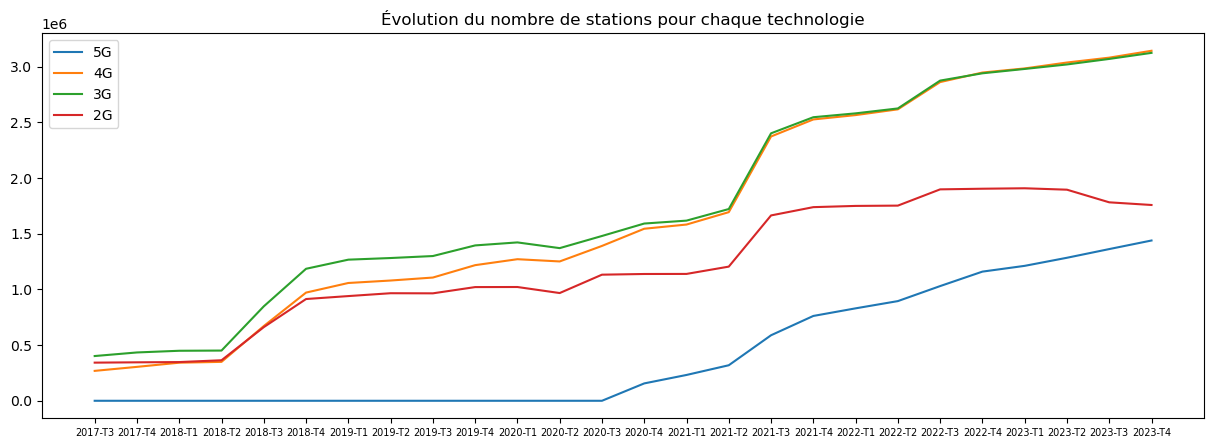

In [23]:

print(len(dates))
plt.figure(figsize=(15,5))
for techno in range(5, 1, -1):
    plt.plot(dates,generations_date_counts[techno-2], label = f"{techno}G")
plt.gca().xaxis.set_tick_params(labelsize = 7)
plt.legend(loc="upper left")
plt.title("Évolution du nombre de stations pour chaque technologie")
plt.savefig("../../out/images/technos-evolution")
plt.show()